In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-------IMPORTING THE CSV FILE-----------------------

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


--------CHECKING FOR THE NULLS-----(HEALTH OF THR DATA)----------------------------------------

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

----no null present as of now---------------------------

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


------------looks like a heatlhy dataset in terms of nulls --------------------

In [7]:
df.shape
rows=df.shape[0]
clmns=df.shape[1]
print('total rows are ',rows,'and  columns are',clmns)

total rows are  1599 and  columns are 12


------LET DESCRIBE THE DATA SET ---------------------------------------------------

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


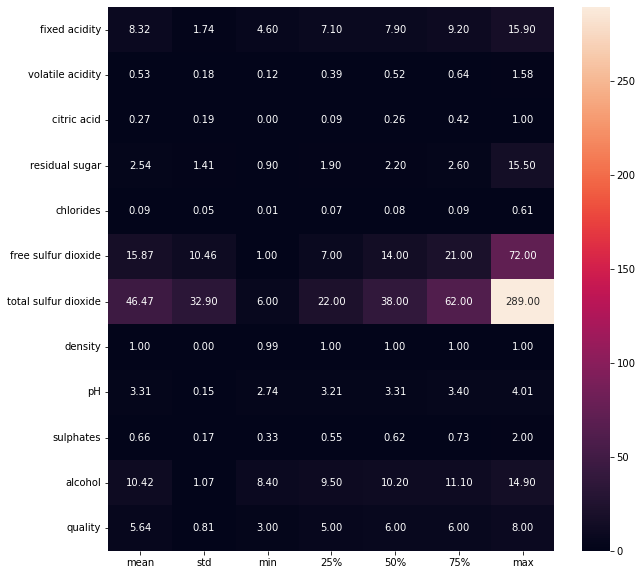

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe()[1:].T,annot=True,annot_kws={'size':10},fmt='.2f')
plt.show()

MEANWHILE LETS CHECK THE CORELATION BETWEEN THE FEATURES AND TARGET

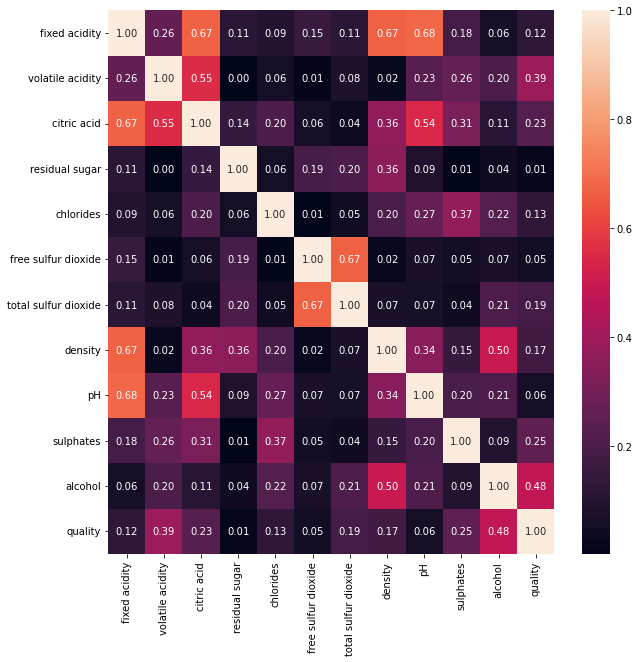

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10},fmt='.2f')
plt.show()

since no 2 features have more than 80 percent of correlation between them chances of multicollinearity problem have reduced to a good extent and no need to check further

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:ylabel='QUALITY'>

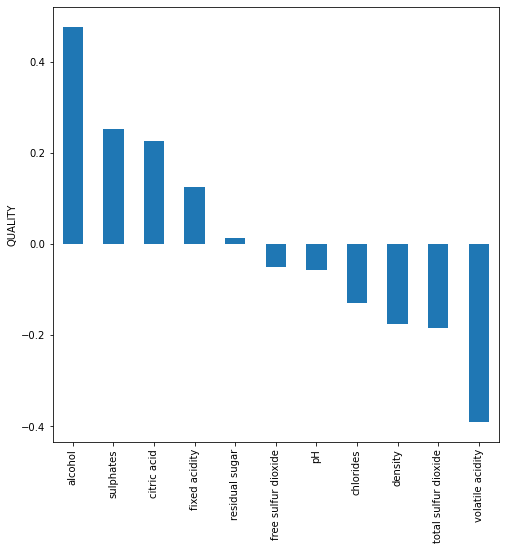

In [11]:
print(df.corr()['quality'].sort_values(ascending=False))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',figsize=(8,8),ylabel='QUALITY')

residual sugar          
free sulfur dioxide    
pH
are showing very little correlation so we will check them graphically



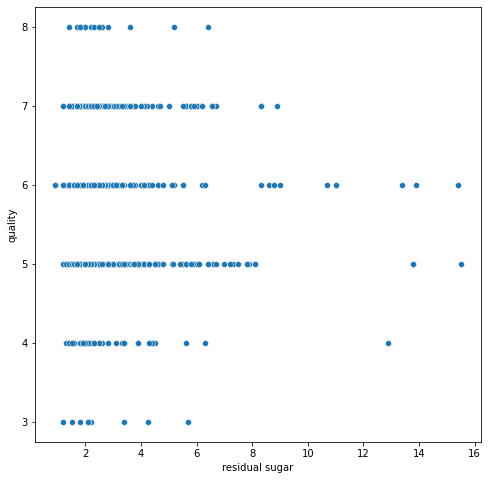

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['quality'],x=df['residual sugar'])
plt.show()

AS THERE IS SUBSTANTIAL AMOUNT OF PATTERN EXISTING BETWEEN RESIDUAL SUAGR AND QUALITY WE CANT IGNORE THIS FEATURE HENCE WE ARE NOT DROPPING THIS FEATURE

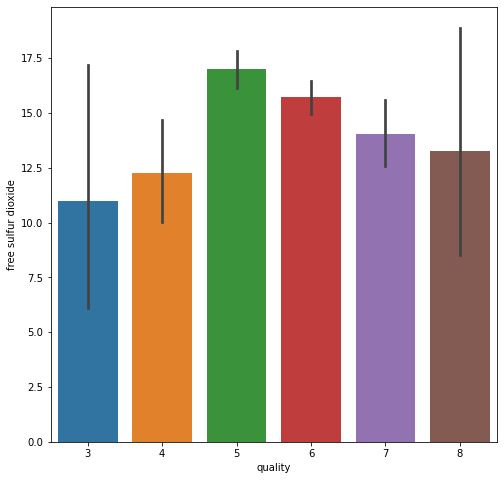

In [13]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'])
plt.show()

AS THERE IS SUBSTANTIAL AMOUNT OF PATTERN EXISTING BETWEEN RESIDUAL SUAGR AND QUALITY WE CANT IGNORE THIS FEATURE HENCE WE ARE NOT DROPPING THIS FEATURE

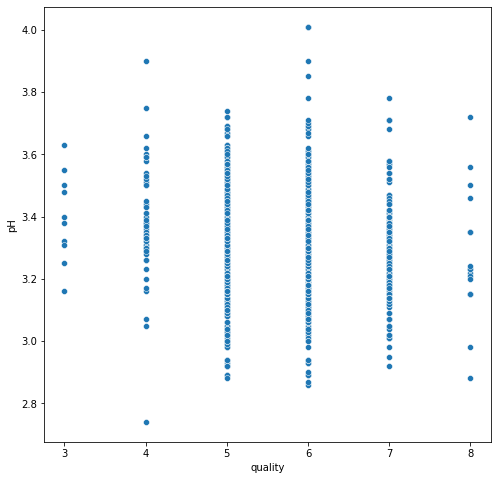

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['quality'],y=df['pH'])
plt.show()

LETS DROP THIS PH FEATURE BECAUSE NO PATTERN IS VISIBLE BETWEEN QUALITY AND IT.

In [15]:
df=df.drop(['pH'],axis=1)

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5


In [17]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

-----lets check the distribution of our data------------------------------

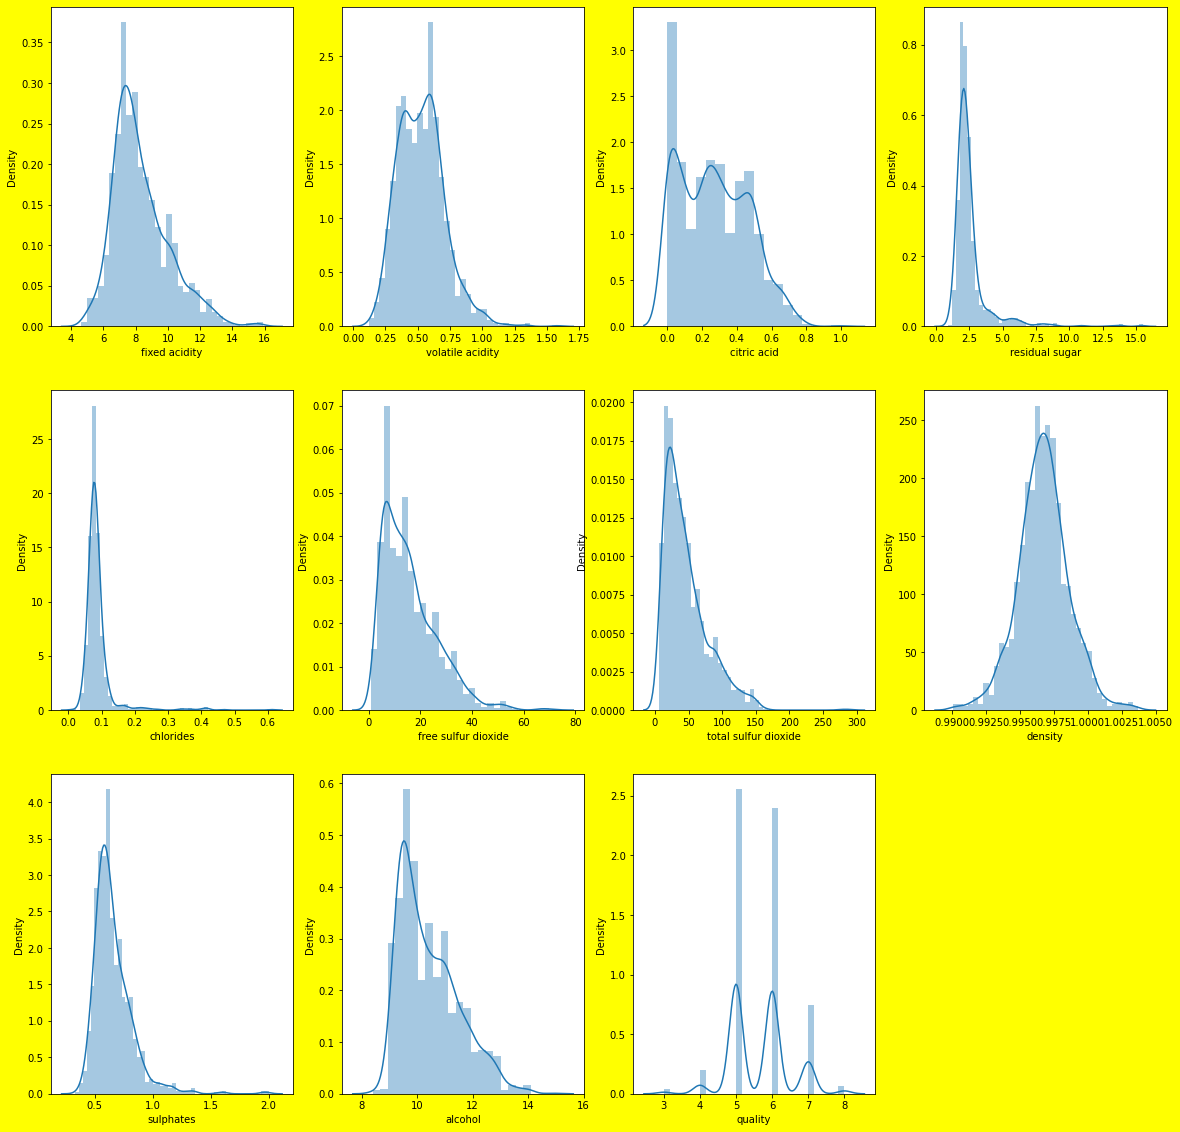

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in df:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    n+=1
plt.show()  

density                 0.071288
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64


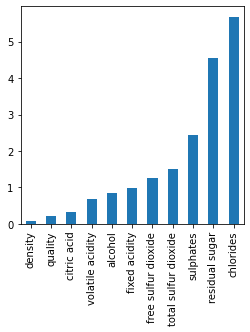

In [19]:
print(df.skew().sort_values())
df.skew().sort_values().plot(kind='bar',figsize=(4,4))
plt.show()

SOME OF THE FEATURES LIKE -
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
are deviating too much from normal distribution so we need to use some techniques to reduce the skewness and establish something close to a normal distribution


In [20]:
def rea(n):
    if n>=7:
        return 1
    else:
        return 0

In [21]:
df['new_target']=df['quality'].apply(rea)

----------CREATED A NEW TARGET FEATURE IN WHICH QUALITY EQUAL TO AND GREATER THAN 7 ARE TREATED AS 1 AND EVERYTHING ELSE AS ZERO----------

In [22]:
df['new_target'].value_counts()

0    1382
1     217
Name: new_target, dtype: int64

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,new_target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,0


In [24]:
 df.drop(['quality'],axis=1,inplace=True)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,new_target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0


In [26]:
x=df.drop(['new_target'],axis=1)

In [27]:
y=df['new_target']

In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: new_target, dtype: int64

In [29]:
y.value_counts()

0    1382
1     217
Name: new_target, dtype: int64

WE HAVE TO USE OVERSAMPLING TO COUNTER THE IMBALANCE

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm=SMOTE(0.75)

In [32]:
x_n,y_n=sm.fit_resample(x,y)

In [33]:
y_n.value_counts()

0    1382
1    1036
Name: new_target, dtype: int64

--------------------DONE USING THE SMOTE AND SAMPLING OUR DATA------------------------

In [34]:
x_new=pd.DataFrame(x_n)

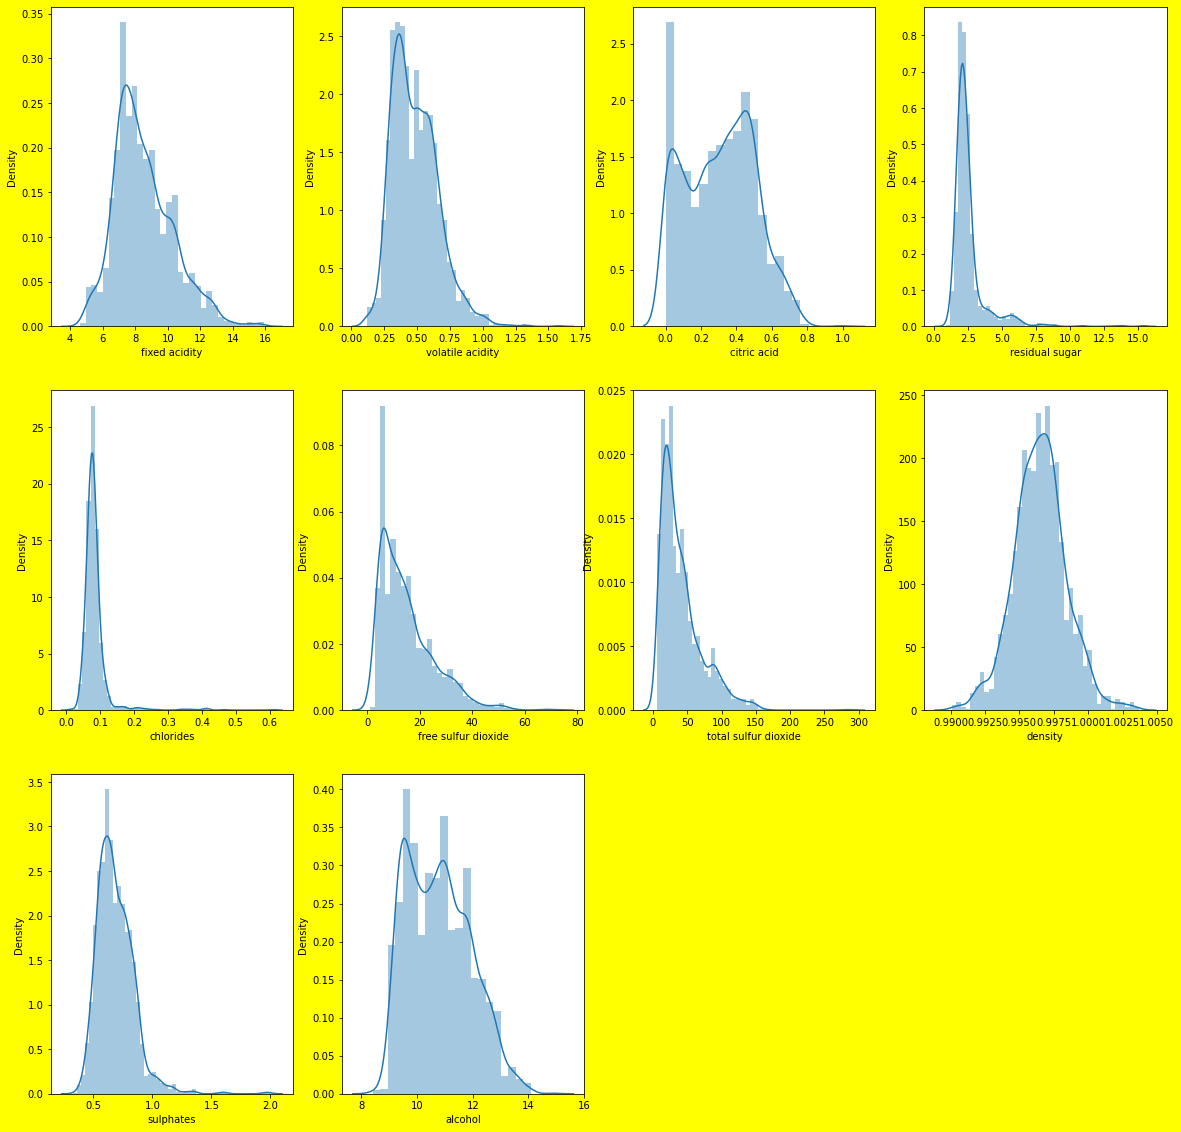

In [35]:
plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in x_new:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.distplot(x_new[i])
        plt.xlabel(i,fontsize=10)
    n+=1
plt.show() 

In [36]:
dff=pd.concat([x_new,y_n],axis=1)

In [37]:
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,new_target
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,0.580000,9.800000,0
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
2413,8.852362,0.350472,0.438090,1.758727,0.066873,6.587270,15.587270,0.994876,0.710637,12.211089,1
2414,9.630265,0.423824,0.476135,2.607566,0.073765,11.231085,19.000000,0.996115,0.671595,11.507566,1
2415,7.076754,0.511732,0.196754,2.123246,0.074941,13.767544,28.000000,0.995871,0.662215,10.622149,1
2416,7.557134,0.270000,0.437128,2.642805,0.137986,4.285670,8.571341,0.995700,0.765695,10.685763,1


-----------------checking for the outliers--------------------------------------------

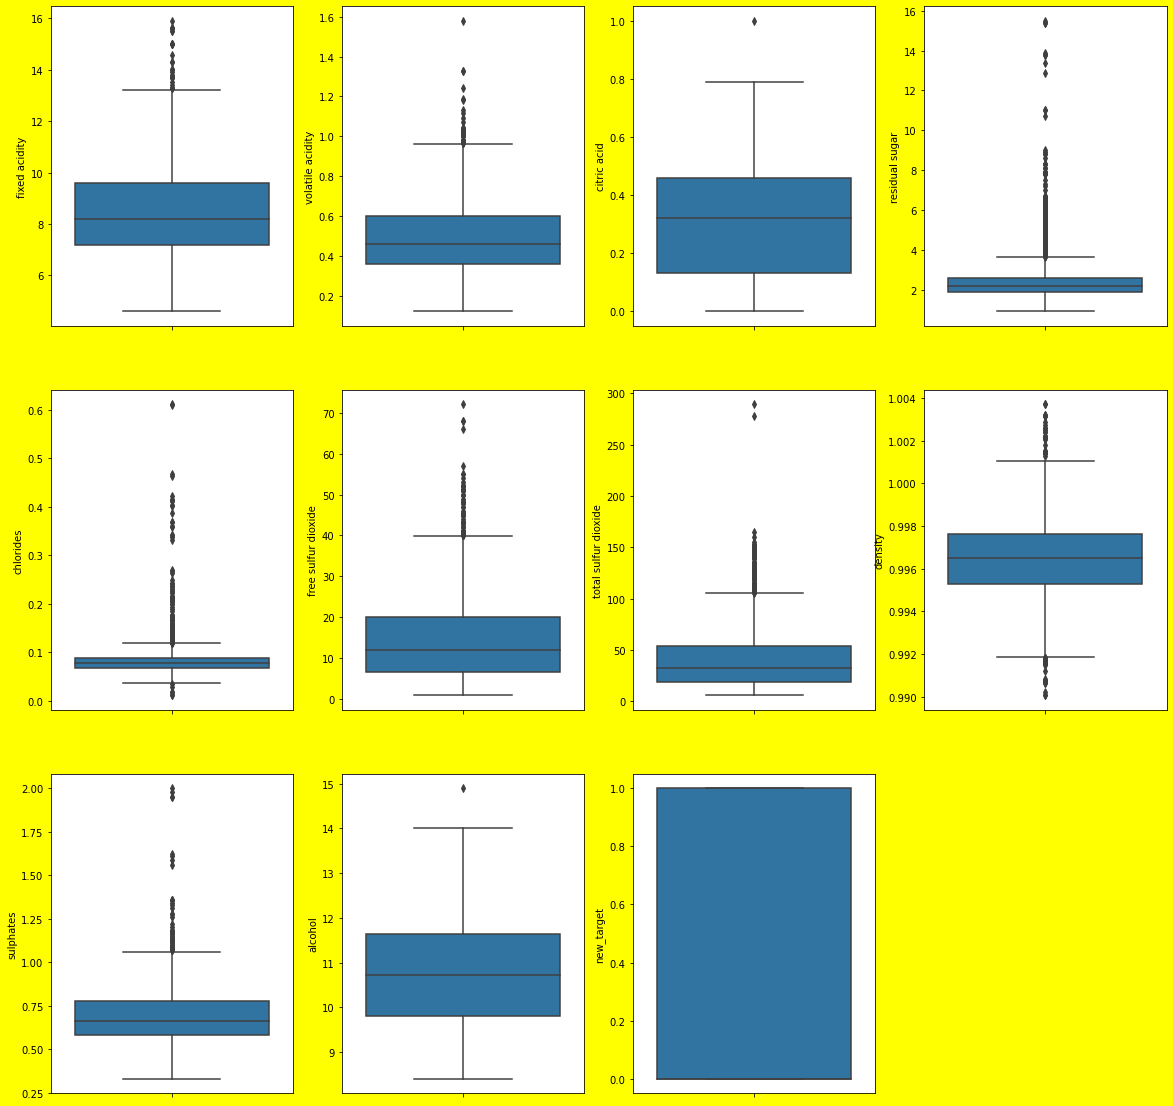

In [38]:
plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in dff:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.boxplot(y=dff[i])
    n+=1
plt.show() 

LETS HANDLE THE OUTLIERS USING ZSCORE

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(dff))

In [41]:
dff_new=dff[(z<3).all(axis=1)]

In [42]:
dff_new.shape

(2228, 11)

In [43]:
dff.shape

(2418, 11)

In [44]:
((dff.shape[0]-dff_new.shape[0])/dff.shape[0])*100

7.857733664185278

SINCE LOSS IS LESS THAN 10 PERCENT WE CAN ACCEPT THE NEW DATAFRAME

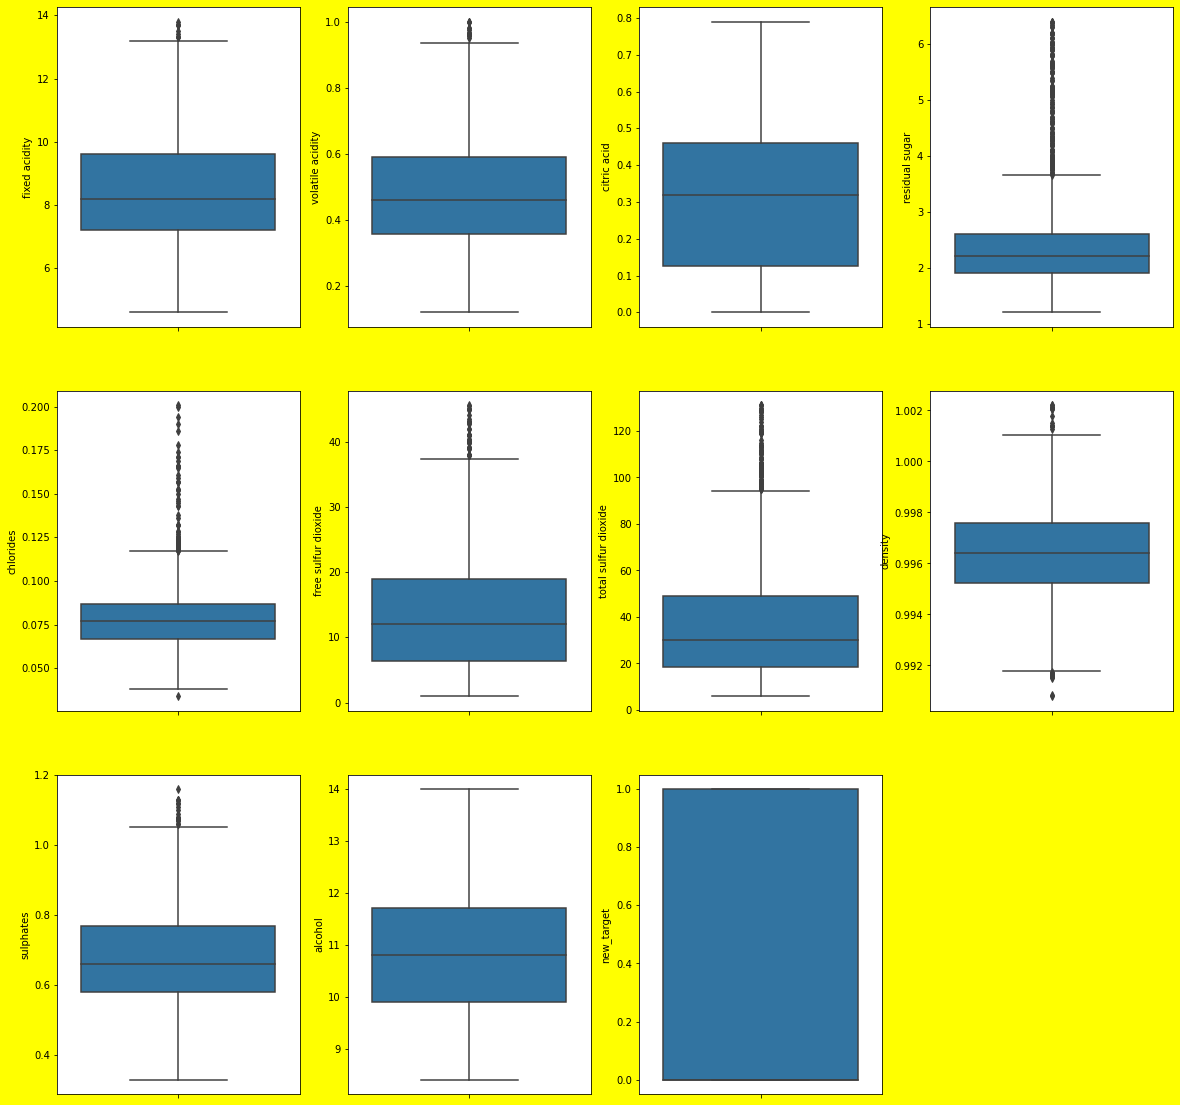

In [45]:
plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in dff_new:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.boxplot(y=dff_new[i])
    n+=1
plt.show() 

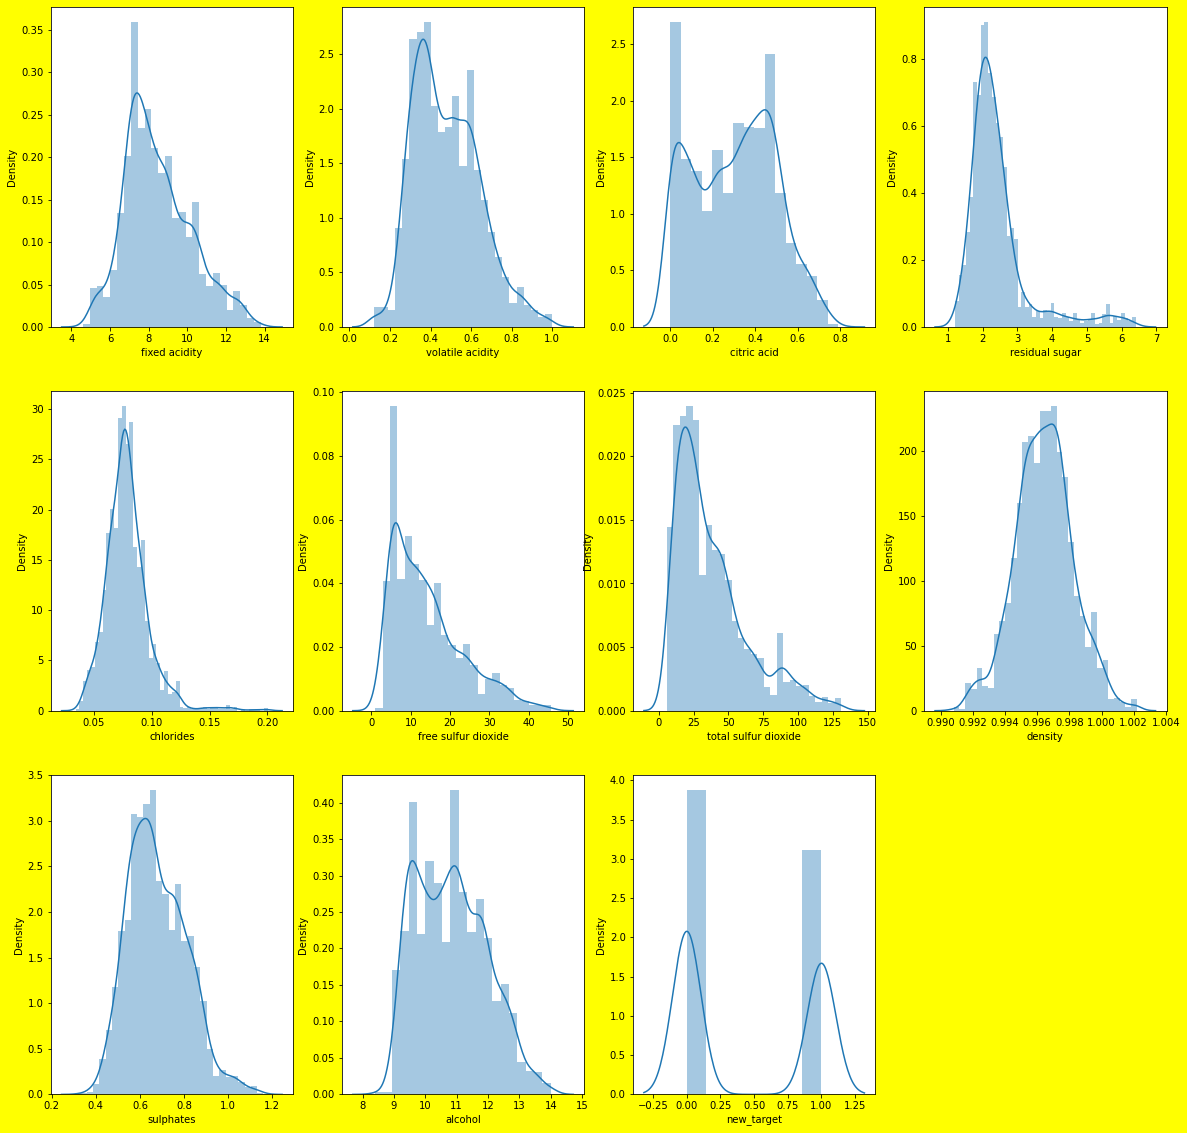

In [46]:
plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in dff_new:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.distplot(dff_new[i])
        plt.xlabel(i,fontsize=10)
    n+=1
plt.show() 

TREATING RESIDUAL SUGAR ,TOTAL SULPHUR DIOXIDE,AND CHLORIDES WITH QUANTILE RANGE SINCE ZSCOEW WAS NOT THAT EFFECTIVE IN THIER OUTLIERS


In [47]:
q1=dff_new.quantile(0.25)
q3=dff_new.quantile(0.75)

In [48]:
iqr=q3-q1

In [49]:
dff_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'new_target'],
      dtype='object')

In [50]:
upp=q3['total sulfur dioxide']+1.5*iqr['total sulfur dioxide']

In [51]:
index=np.where(dff_new['total sulfur dioxide']>upp)
dff_new.shape

(2228, 11)

In [52]:
dff_new=dff_new.drop(dff_new.index[index])

In [53]:
dff_new.shape

(2124, 11)

In [54]:
upp1=q3['residual sugar']+1.5*iqr['residual sugar']

In [55]:
index1=np.where(dff_new['residual sugar']>upp1)
dff_new=dff_new.drop(dff_new.index[index1])

In [56]:
upp2=q3['chlorides']+1.5*iqr['chlorides']
index2=np.where(dff_new['chlorides']>upp2)
dff_new=dff_new.drop(dff_new.index[index2])

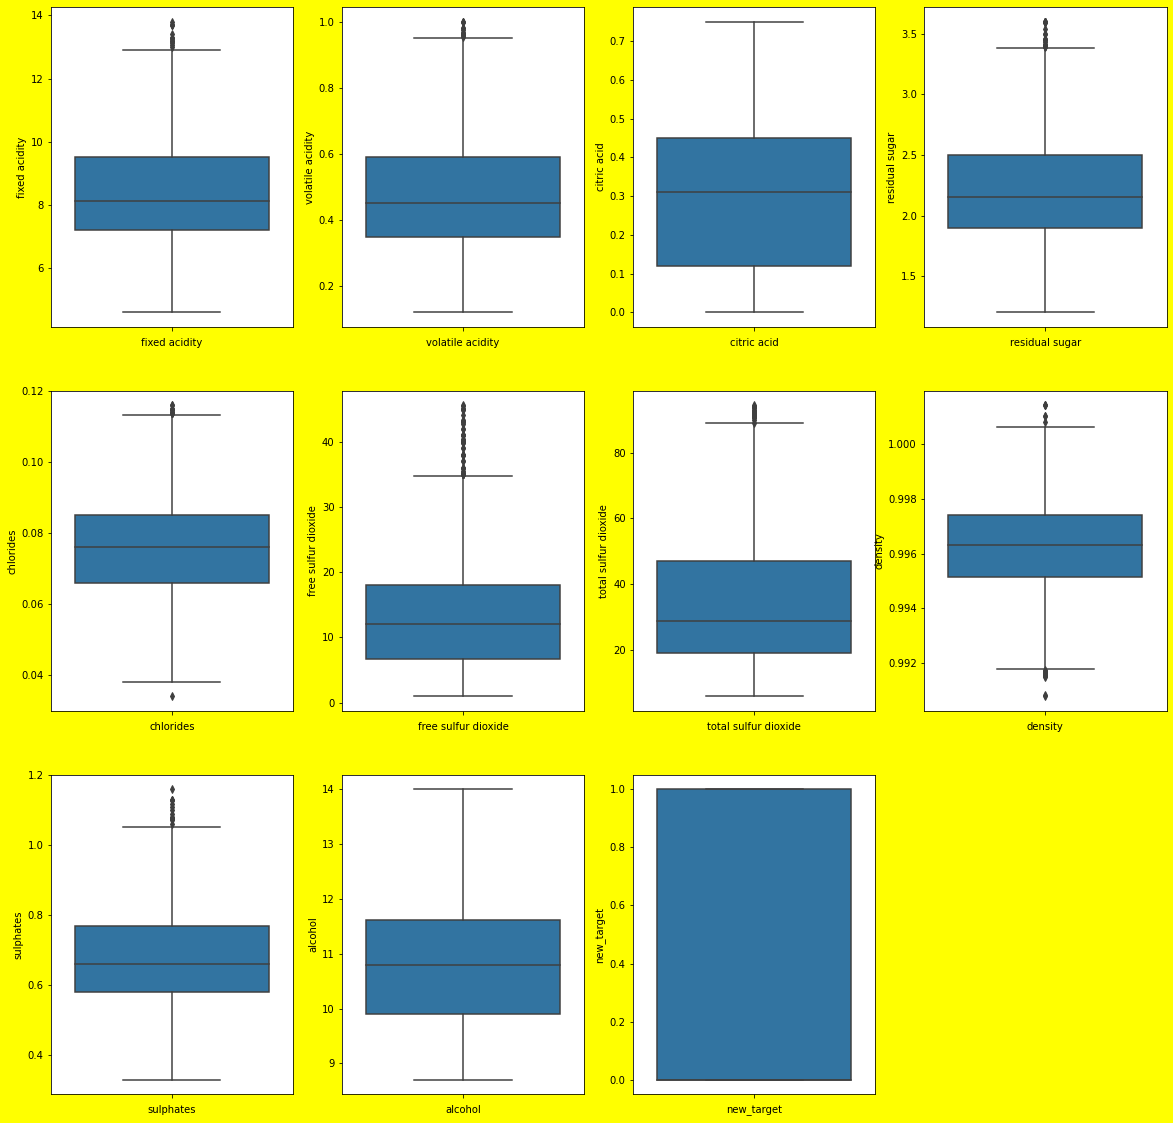

In [57]:
plt.figure(figsize=(20,20),facecolor='Yellow')
n=1
for i in dff_new:
    if n<13:
        ax=plt.subplot(3,4,n)
        sns.boxplot(y=dff_new[i])
        plt.xlabel(i,fontsize=10)
    n+=1
plt.show() 

HENCE ALL MAJOR OUTLIERS ARE REMOVED AND WE CAN PROCEED FURTHER

In [58]:
dff_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,new_target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,0


----POWER TRANSFORMATION-----------------

In [59]:
from sklearn.preprocessing import PowerTransformer
po=PowerTransformer(method='yeo-johnson')

In [60]:
x=dff_new.drop(['new_target'],axis=1)

In [61]:
y=dff_new['new_target']

In [62]:
x_trans=po.fit_transform(x)

In [63]:
x_trans

array([[-0.55330487,  1.33834723, -1.58781574, ...,  0.84941094,
        -0.92475658, -1.40807997],
       [-0.28088782,  2.0749354 , -1.58781574, ...,  0.28058198,
         0.07872236, -0.93589877],
       [-0.28088782,  1.60246834, -1.36056646, ...,  0.39416872,
        -0.15655932, -0.93589877],
       ...,
       [ 0.78088444, -0.20061218,  0.95207241, ..., -0.10770064,
         0.01377763,  0.69481433],
       [-0.78659311,  0.35705618, -0.49713107, ..., -0.24595176,
        -0.05959107, -0.08187017],
       [ 1.34643436,  0.38114832,  1.78645306, ...,  0.64727164,
         0.10336515,  0.85726311]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve,roc_auc_score,mean_squared_error,mean_absolute_error


In [65]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred1=lr.predict(x_train)
    y_pred2=lr.predict(x_test)
    train_accuracy_score=accuracy_score(y_train,y_pred1)
    test_accuracy_score=accuracy_score(y_test,y_pred2)
    if(round(train_accuracy_score*100,1) == round(test_accuracy_score*100,1)):
        
        print('\n\nAT RANDOM STATE--',i)
        print(f"\n\nTRAIN ACCURACY SCORE IS --{round(train_accuracy_score*100,2)} and TEST ACCURACY SCORE IS {round(test_accuracy_score*100,2)}")
        print('\n---------------------------------------------------\n')



AT RANDOM STATE-- 31


TRAIN ACCURACY SCORE IS --83.31 and TEST ACCURACY SCORE IS 83.26

---------------------------------------------------



AT RANDOM STATE-- 33


TRAIN ACCURACY SCORE IS --83.73 and TEST ACCURACY SCORE IS 83.69

---------------------------------------------------



AT RANDOM STATE-- 37


TRAIN ACCURACY SCORE IS --83.1 and TEST ACCURACY SCORE IS 83.05

---------------------------------------------------



AT RANDOM STATE-- 50


TRAIN ACCURACY SCORE IS --83.52 and TEST ACCURACY SCORE IS 83.47

---------------------------------------------------



AT RANDOM STATE-- 96


TRAIN ACCURACY SCORE IS --83.1 and TEST ACCURACY SCORE IS 83.05

---------------------------------------------------



AT RANDOM STATE-- 116


TRAIN ACCURACY SCORE IS --83.45 and TEST ACCURACY SCORE IS 83.47

---------------------------------------------------



AT RANDOM STATE-- 168


TRAIN ACCURACY SCORE IS --83.31 and TEST ACCURACY SCORE IS 83.26

---------------------------------------------

BASED ON THE ABOVE ACCURACY SCORES WE WILL TAKE RANDOM STATE AS 380 BECAUSE IT GIVES HIGHEST TRAINING AND TESTING SCORE WITH EFFECTIVE DIIFERNCE BETWEEN THEM

In [66]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
      
        

In [67]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_trans,y,random_state=380,test_size=0.25)
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 83.38


Testing SCORE FOR THE LogisticRegression() is 84.53


---------------------HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION---------------------------------------------------------

In [68]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
C = np.logspace(-10, 10, 50)
penalty = ['l1', 'l2']

In [71]:
params={'C':C,'penalty':penalty}

In [72]:
gsc=GridSearchCV(lr,param_grid=params)

In [73]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-0...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [74]:
gsc.best_params_

{'C': 0.2442053094548655, 'penalty': 'l2'}

In [75]:
lr=LogisticRegression(C=0.09540954763499963,penalty='l2')

In [76]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression(C=0.09540954763499963) is 83.31


Testing SCORE FOR THE LogisticRegression(C=0.09540954763499963) is 84.32


SINCE ITS NOT EFFECTING MUCH OF THE SCORES WE WILL GO WITH DEFAULT PARAMETERS IN LOGISCTICS REGRESSION----------

In [77]:
lr=LogisticRegression(random_state=380)
x_train,x_test,y_train,y_test=train_test_split(x_trans,y,random_state=380,test_size=0.25)
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression(random_state=380) is 83.38


Testing SCORE FOR THE LogisticRegression(random_state=380) is 84.53


---------------------------CHECKING IF OUR MODEL OVERFIT-----USING CROSS VAL SCORE----------------------------------

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
test_pred=lr.predict(x_test)
test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_trans,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",test_accuracy)      
    print('----------------------------------------------------------')
    
    


AT CV = 2

CROSS VAL SCORE IS  77.25

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 3

CROSS VAL SCORE IS  80.96

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 4

CROSS VAL SCORE IS  80.91

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 5

CROSS VAL SCORE IS  81.33

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 6

CROSS VAL SCORE IS  81.44

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 7

CROSS VAL SCORE IS  81.49

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 8

CROSS VAL SCORE IS  81.5

TEST ACCURACY SCORE IS  84.53
----------------------------------------------------------

AT CV = 9

CROSS VAL SCORE IS  81.7

TEST ACCURACY SCORE IS  84.53
-------------------------------------

SINCE DIFFERNCE BETWEEN CROSS VAL SCORE AND ACCURACY SCORE IS NOT MUCH OUR MODEL IS NOT OVER FITTING AND WE TAKE CV=8 SINCE IT GIVES THE LEAST DIFFERENCE OF ACCURACY SCORE AND CROSS VAL SCORE

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

MODEL 2)---DECISION TREE MODELING

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt=DecisionTreeClassifier(random_state=380)

In [82]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=380)

In [83]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(random_state=380) is 100.0


Testing SCORE FOR THE DecisionTreeClassifier(random_state=380) is 89.41


In [84]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

for i in range(2,11):
    cross_val=cross_val_score(dt,x_trans,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  76.62

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 3

CROSS VAL SCORE IS  83.51

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 4

CROSS VAL SCORE IS  84.41

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 5

CROSS VAL SCORE IS  85.31

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 6

CROSS VAL SCORE IS  85.0

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 7

CROSS VAL SCORE IS  85.26

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 8

CROSS VAL SCORE IS  86.27

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 9

CROSS VAL SCORE IS  83.88

TEST ACCURACY SCORE IS  89.41
-------------

AT CV = 10

CROSS VAL SCORE IS  84.83

TEST ACCURACY SCORE IS  89.41
-------------


---------SINCE TRAIN ACCURACY IS MUCH MORE THAN CROSS VAL SCORE WE HAVE TO DO HYPER PARAMETER TUNING TO OVERCOME THIS ISSUE--------

In [85]:
dt.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [86]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(25,30),
      'min_samples_split':np.arange(3,5),
      'min_samples_leaf':np.arange(8,12)}
      

In [87]:
dgsc=GridSearchCV(dt,param_grid=para,cv=8)

In [88]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=380),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 8,  9, 10, 11]),
                         'min_samples_split': array([3, 4])})

In [89]:
dgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

In [90]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=22,min_samples_leaf=10,min_samples_split=3)

In [91]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=10, min_samples_split=3)

In [92]:
train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
dt_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)

In [93]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --91.16 and TEST ACCURACY SCORE IS 86.44


In [94]:
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
dt_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
cross_val=cross_val_score(dt,x_trans,y,cv=8).mean()
print('\nAT CV =8')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)     
print("\nTRAIN ACCURACY SCORE IS ",dt_train_accuracy)
print('-------------')


AT CV =8

CROSS VAL SCORE IS  83.03

TEST ACCURACY SCORE IS  86.44

TRAIN ACCURACY SCORE IS  91.16
-------------


MODEL 3)---------------------------RANDOM FOREST CLASSIFIER--------------------------------------------------------------------

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc=RandomForestClassifier()

In [97]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [99]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,rfc_train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,rfc_test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --100.0 and TEST ACCURACY SCORE IS 92.8


------------------------------HYPERPARAMETER TUNUNG-----------------------------------------

In [100]:
rfc.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

rg.best_params_={'criterion': 'gini',
 'max_depth': 21,
 'min_samples_split': 3,
 'n_estimators': 51,
 'n_jobs': 4}

In [101]:
rfc=RandomForestClassifier(criterion='gini',max_depth=21,min_samples_split=3,n_estimators=51,n_jobs=2)

In [102]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=21, min_samples_split=3, n_estimators=51,
                       n_jobs=2)

In [103]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [104]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,rfc_train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,rfc_test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --100.0 and TEST ACCURACY SCORE IS 92.16


In [105]:
rfc_test_accuracy=round(accuracy_score(y_test,rfc_test_pred)*100,2)
rfc_train_accuracy=round(accuracy_score(y_train,rfc_train_pred)*100,2)
cross_val=cross_val_score(rfc,x_trans,y,cv=8).mean()
print('\nAT CV =8')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)     
print("\nTRAIN ACCURACY SCORE IS ",rfc_train_accuracy)
print('-------------')


AT CV =8

CROSS VAL SCORE IS  90.3

TEST ACCURACY SCORE IS  92.16

TRAIN ACCURACY SCORE IS  100.0
-------------


MODEL 4)-KNN 

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier()

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)

In [110]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,knn_train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,knn_test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --90.45 and TEST ACCURACY SCORE IS 88.14


In [112]:
knn.get_params().keys()


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [113]:
par={'algorithm':['ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(5,9)}

In [114]:
kgsc=GridSearchCV(knn,param_grid=par)

In [115]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([5, 6, 7, 8])})

In [116]:
kgsc.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 6}

In [117]:
knn=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=6)

In [118]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)

In [119]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)

In [120]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,knn_train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,knn_test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --91.8 and TEST ACCURACY SCORE IS 88.77


In [121]:
knn_test_accuracy=round(accuracy_score(y_test,knn_test_pred)*100,2)
knn_train_accuracy=round(accuracy_score(y_train,knn_train_pred)*100,2)
cross_val=cross_val_score(knn,x_trans,y,cv=8).mean()
print('\nAT CV =8')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)     
print("\nTRAIN ACCURACY SCORE IS ",knn_train_accuracy)
print('-------------')


AT CV =8

CROSS VAL SCORE IS  85.21

TEST ACCURACY SCORE IS  88.77

TRAIN ACCURACY SCORE IS  91.8
-------------


MODEL 5)-------SVM-----------------------------------------------------------

In [122]:
from sklearn.svm import SVC

In [123]:
svc=SVC()

In [124]:
svc.fit(x_train,y_train)

SVC()

In [125]:
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)

In [126]:
print(f"\n\nTRAIN ACCURACY SCORE IS --{round(accuracy_score(y_train,svc_train_pred)*100,2)} and TEST ACCURACY SCORE IS {round(accuracy_score(y_test,svc_test_pred)*100,2)}")



TRAIN ACCURACY SCORE IS --90.45 and TEST ACCURACY SCORE IS 88.56


In [127]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [128]:
svc_test_accuracy=round(accuracy_score(y_test,svc_test_pred)*100,2)
svc_train_accuracy=round(accuracy_score(y_train,svc_train_pred)*100,2)
cross_val=cross_val_score(svc,x_trans,y,cv=8).mean()
print('\nAT CV =8')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)     
print("\nTRAIN ACCURACY SCORE IS ",svc_train_accuracy)
print('-------------')


AT CV =8

CROSS VAL SCORE IS  86.22

TEST ACCURACY SCORE IS  88.56

TRAIN ACCURACY SCORE IS  90.45
-------------


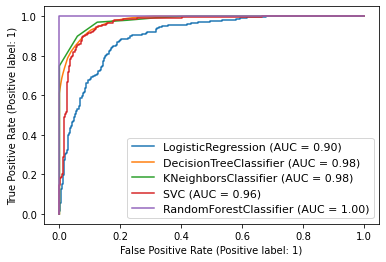

In [129]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

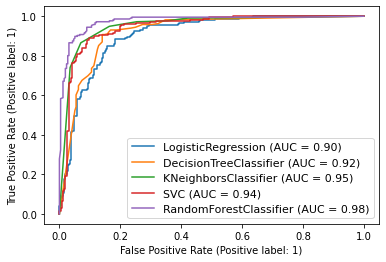

In [130]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

SINCE AREA UNDER THE CURVE IS ALMOST SAME FOR SVC IN BOTH TESTING AND TRAINING AND DIFFERNECE BETWEEN ACCURACY SCORE AND CROSS VAL SCORE IS ALSO QUIET IN RANGE WE WILL CHOOSE SVC AS OUR MODEL FOR THIS PROBLEM STATEMENT



CONCLUSION-SVC MODEL BEST FOR THIS PROBLEM STATEMENT